# Radon transform

The general Radon transform is expressed as
\begin{equation}
\label{eq:general}
\begin{split}
\tilde{m}(\tau,p) &= \int d(t=\phi(\tau,h,p),h) dh, \\
d(t,h) &= \int m(\tau=\tilde{\phi}(t,h,p),p) dp,
\end{split}
\end{equation}
with $\phi(\tau,h,p)$ called the kernel functions. By choosing different kernel functions, the Radon transform can be categorized into linear, parabolic, hyperbolic Radon transform. 

Linear Radon transform
\begin{equation}
\label{eq:li}
\begin{split}
\tilde{m}(\tau,p) &= \sum_{h} d(t=\tau+ph,h) \\
d(t,h) &= \sum_{p} m(\tau=t-ph,p) 
\end{split}
\end{equation}

Parabolic Radon transform
\begin{equation}
\label{eq:para}
\begin{split}
\tilde{m}(\tau,p) &= \sum_{h} d(t=\tau+ph^2,h) \\
d(t,h) &= \sum_{p} m(\tau=t-ph^2,p) 
\end{split}
\end{equation}

Hyperbolic Radon transform
\begin{equation}
\label{eq:hyp}
\begin{split}
\tilde{m}(\tau,p) &= \sum_{h} d(t=\sqrt{\tau^2+\frac{h^2}{p^2}},h), \\
d(t,h) &= \sum_{p} m(\tau=\sqrt{t^2-\frac{h^2}{p^2}},p), 
\end{split}
\end{equation}


References:

Sacchi, M. D., & Ulrych, T. J. (1995). High-resolution velocity gathers and offset space reconstruction. Geophysics, 60(4), 1169-1177.

Chen, Y., 2018. Automatic velocity analysis using high-resolution hyperbolic Radon transform. Geophysics, 83(4), pp.A53-A57.

Zhang, Q., Chen, Y., Zhang, F. and Chen, Y., 2022. Improving receiver function imaging with high-resolution Radon transform. Geophysical Journal International, 230(2), pp.1292-1304.


# 1. Linear Radon transform

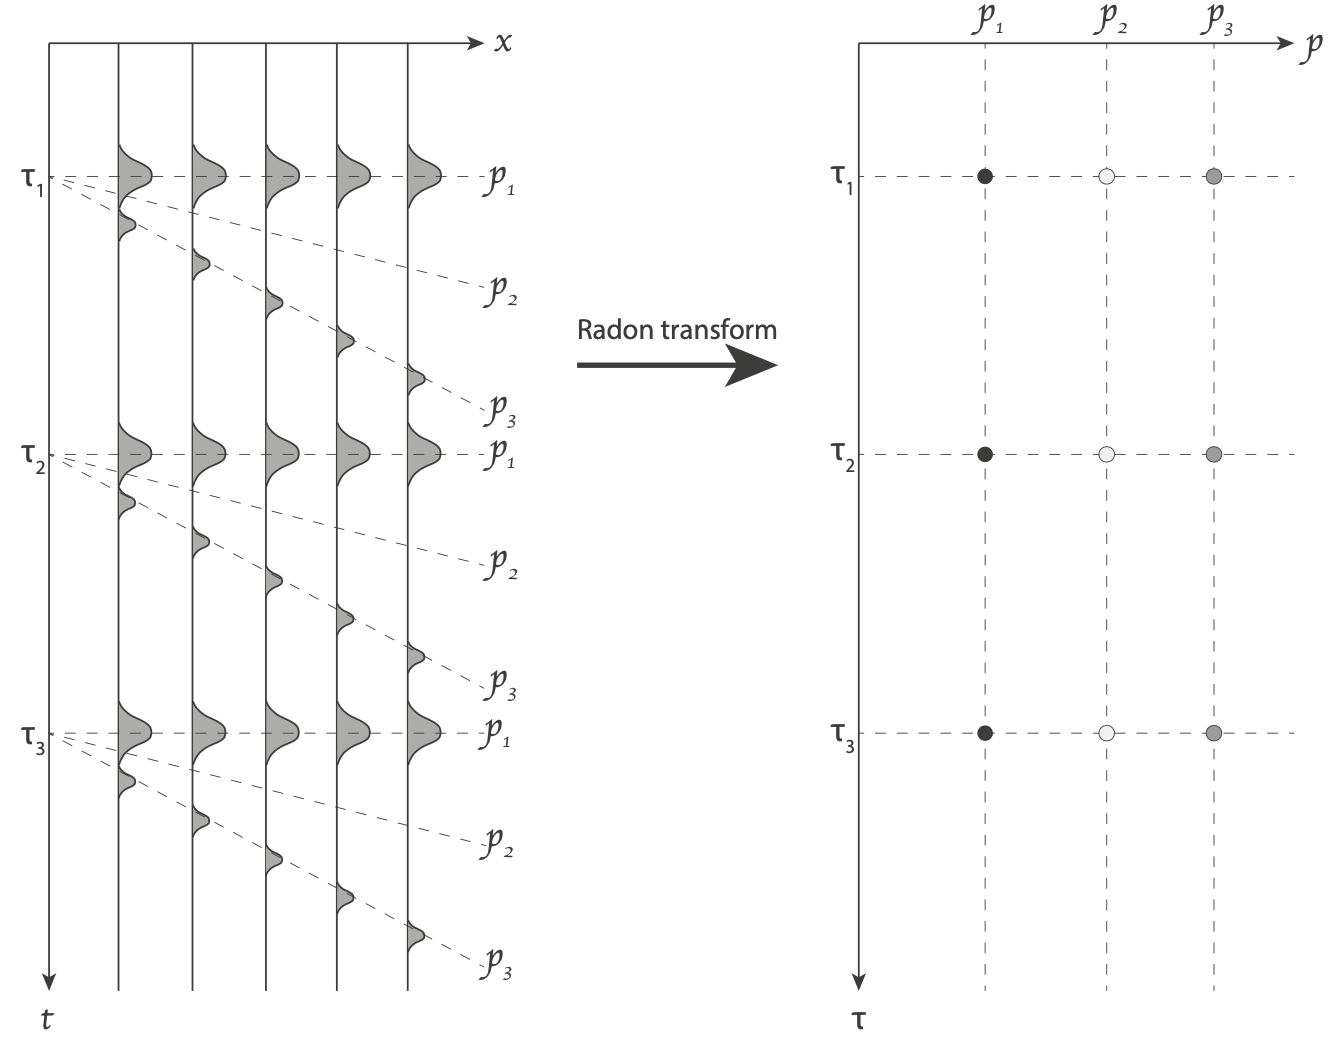

A cartoon illustrates the concept of Radon transform. The left-hand panel shows the waveform in t–x domain with three groups of seismic phases characterized by different intercept times (τ1, τ2 and τ3). Within each group, a set of ray parameters determine the dip of phase arrivals (p1, p2 and p3). The right panel shows the Radon domain (τ –p) image. Each circle is computed by summing the amplitude along the linear trajectory defined by parameters τ and p. The grey-scale indicates the stacked energy, with strong (p1), weak (p3) and absent (p2) phase arrivals marked in black, grey and white, respectively.

In [8]:
# This script is a demo for reconstructing linear events via High-resolution Linear Radon transform

import numpy as np
import matplotlib.pyplot as plt

def radon_op(din,param,oper):
    h=param['h']
    v=param['v']
    nt=param['nt']
    dt=param['dt']
    type=param['type']
    
    nh=len(h)
    nv=len(v)
    
    if oper == -1:
        m=np.zeros([nt,nv]);
       
    if oper == 1:
        d=np.zeros([nt,nh]);
    
    if oper == -1:
        d=din;
        
    if oper == 1:
        m=din;
        
    for itau in range(1,nt+1):
        for ih in range(1,nh+1):
            for iv in range(1,nv+1):
                
                if type==1:
                    t = (itau-1)*dt + h[ih-1]/v[iv-1];
                    it = np.floor(t/dt)+1;
                    it=np.int32(it);
                elif type==2:
                    t = (itau-1)*dt + h[ih-1]*h[ih-1]*v[iv-1]/hmax/hmax;   
                    it = np.floor(t/dt)+1;
                    it=np.int32(it);
                elif type==3:
                    t = np.sqrt (((itau-1)*dt)*((itau-1)*dt) + (h[ih-1]/v[iv-1])*(h[ih-1]/v[iv-1]) ) ;
                    it = np.floor(t/dt)+1;
                    it=np.int32(it);
                else:
                    t = np.sqrt (((itau-1)*dt)*((itau-1)*dt) + (h[ih-1]/v[iv-1])*(h[ih-1]/v[iv-1]) ) ;
                    it = np.floor(t/dt)+1;
                    it=np.int32(it);
                    
                if it <= nt and it-1>0:
                    if oper == -1:
                        m[itau-1,iv-1] = m[itau-1,iv-1] + d[it-1,ih-1];
                    if oper == 1:
                        d[it-1,ih-1]  = d[it-1,ih-1] + m[itau-1,iv-1];
    if oper == 1:
        return d;
    if oper == -1:
        return m;
    
def ricker(f,dt,tlength=None):
    # ricker: Ricker wavelet of central frequency f.
    #
    # INPUT:
    # f : central freq. in Hz (f <<1/(2dt) )
    # dt: sampling interval in sec
    # tlength : the duration of wavelet in sec
    #
    # OUTPUT: 
    # w:  the Ricker wavelet
    # tw: time axis
    #
    # Example
    #
    #   [w,tw] = ricker(10,0.004,0.2);
    #   pyplot.plot(tw,w);
    import numpy as np
    
    if tlength!=None:
        nw=np.floor(tlength/dt)+1;
    else:
        nw=2.2/f/dt;
        nw=2*np.floor(nw/2)+1;
    nc=np.floor(nw/2);
    nw=int(nw)
    w =np.zeros(nw);
    
    k=np.arange(1,nw+1,1);
    alpha = (nc-k+1)*f*dt*np.pi;
    beta=np.power(alpha,2);
    w = (1.-beta*2)*np.exp(-beta);
    tw = -(nc+1-k)*dt;
    return w,tw

In [2]:
dp=0.05;dh=0.1;

h=np.linspace(0,6,int(6/dh+1));

nh=len(h);
p=np.linspace(-0.6,0.60,int(1.21/dp)+1);
nnp=len(p);

dt=0.2;nt=501;
m=np.zeros([nt,nnp]);
d=np.zeros([nt,nh]);
w,tw=ricker(0.5,dt);

In [3]:
tau=[100,200,250];
p0=[0,0.1,0.1];

In [4]:
m[tau[0]-1,12]=1;
m[tau[1]-1,18]=0.4;
m[tau[2]-1,18]=0.5;
# t = np.convolve(m[:,1],w,'same');
import scipy.signal
w=np.expand_dims(w,1);
m=scipy.signal.convolve2d(m,w,'same');

par={'h':h,'v':1/(p+0.00000000001),'nt':nt,'dt':dt,'type':1}

#Forward operator
d=radon_op(m,par,1);
#Adjoint operator
ma = radon_op(d,par,-1);

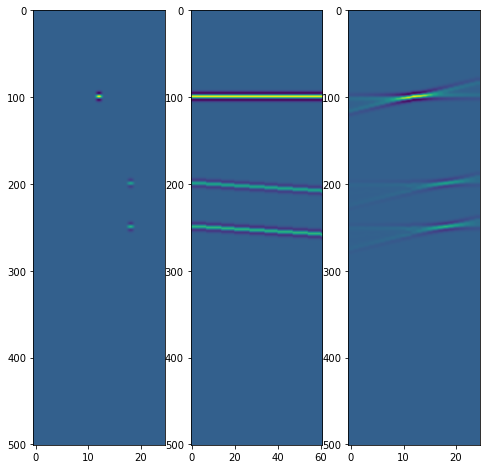

In [5]:
plt.figure(figsize=(8, 8));
plt.subplot(1,3,1)
plt.imshow(m,aspect='auto');
plt.subplot(1,3,2)
plt.imshow(d,aspect='auto');
plt.subplot(1,3,3)
plt.imshow(ma,aspect='auto');
plt.show()

In [6]:
def pcg(oper,par,d,m0,niter_in=10,niter_out=1,verb=0):
    # Precondioned CG for solving sparsity-promoting inverse problems
    # 
    # 
    # Reference: Hestenes, M. R., & Stiefel, E. (1952). Methods of conjugate gradients for solving. Journal of research of the National Bureau of Standards, 49(6), 409.
    #
    
    u=m0;
    P=np.ones(u.shape); #P is an diagonal weighting operator, so I used capital P
    kc=0;
    mis=[];
    m=u;
    for l in range(niter_out):
        di=oper(P*u,par,1);
        r=d-di;
        
        g=oper(r,par,-1);
        g=g*P;
        s=g;
        gammam=np.sum(g*np.conj(g));
        for k in range(niter_in):
            q=oper(P*s,par,1);
            den=np.sum(q*np.conj(q));
            alpha=gammam/(den+1.e-8);
            u=u+alpha*s;
            r=r-alpha*q;
            mis.append(np.sum(r*np.conj(r)));
            g=oper(r,par,-1);
            g=g*P;
            gamma=np.sum(g*np.conj(g));
            beta=gamma/(gammam+1.e-7);
            gammam=gamma;
            s=g+beta*s;
            if verb:
                print("Outer iteration=%d, Inner iteration = %d, Current misfit=%0.5g \n"%(l+1,k+1,mis[kc]));
            kc=kc+1;
        m=P*u;
        P=np.abs(m/np.max(m.flatten()))+0.001;
    mis=np.array(mis);
    return m,mis
    
    

In [7]:
## Least-squares inversion

N1 = 10;  # CG Iterations (Internal loop);
N2 = 1;   # Update of weights for the sparse solution: N1 = 1 LS;  N2 > 3 for High Res (Sparse) solution
[mi,misfit] = pcg(radon_op,par,d,np.zeros(ma.shape),niter_in=N1,niter_out=N2,verb=1);

Outer iteration=1, Inner iteration = 1, Current misfit=39.542 

Outer iteration=1, Inner iteration = 2, Current misfit=12.526 

Outer iteration=1, Inner iteration = 3, Current misfit=6.5335 

Outer iteration=1, Inner iteration = 4, Current misfit=4.7298 

Outer iteration=1, Inner iteration = 5, Current misfit=3.9488 

Outer iteration=1, Inner iteration = 6, Current misfit=3.4958 

Outer iteration=1, Inner iteration = 7, Current misfit=3.1513 

Outer iteration=1, Inner iteration = 8, Current misfit=2.8837 

Outer iteration=1, Inner iteration = 9, Current misfit=2.6656 

Outer iteration=1, Inner iteration = 10, Current misfit=2.4799 



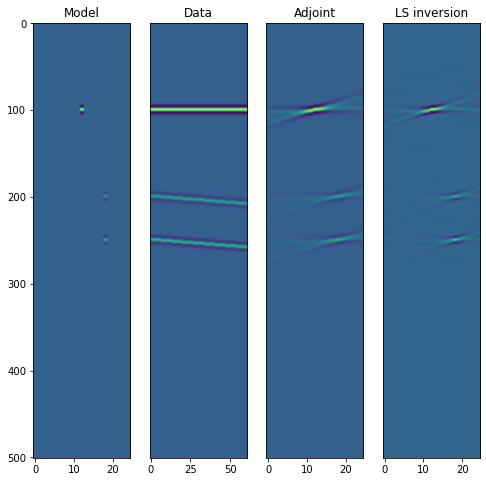

In [8]:
plt.figure(figsize=(8, 8));
plt.subplot(1,4,1)
plt.imshow(m,aspect='auto');plt.title('Model');
plt.subplot(1,4,2)
plt.imshow(d,aspect='auto');plt.title('Data');plt.gca().set_yticks([]);
plt.subplot(1,4,3)
plt.imshow(ma,aspect='auto');plt.title('Adjoint');plt.gca().set_yticks([]);
plt.subplot(1,4,4)
plt.imshow(mi,aspect='auto');plt.title('LS inversion');plt.gca().set_yticks([]);
plt.show()

# High-resolution Radon transform

he inversion problem is usually formulated as a minimization problem in the sense of least-squares mistfit:
\begin{equation}
\label{eq:inv}
\min_{\mathbf{m}}  \parallel \mathbf{d}-\mathbf{Fm} \parallel_2^2. 
\end{equation}

As the above problem is ill-posed, a regularization term must be included. To obtain a sparse representation of the data in the transformed domain, I usually formulate the inversion problem as minimizing the following cost function:
\begin{equation}
\label{eq:cost}
J=\parallel \mathbf{d}-\mathbf{Fm}\parallel_2^2 + \mu \parallel\ \mathbf{m} \parallel_1. 
\end{equation}
where $\parallel\cdot \parallel_2$ denotes the $L_2$-norm data misfit and $\parallel\cdot \parallel_1$ denotes the $L_1$-norm model constraint. $\lambda$ denotes a the compromising parameter that controls the weight between the data misfit and model constraint. 

Note that 
\begin{equation}
\label{eq:l1l2}
\parallel \mathbf{m} \parallel_1 = \sum_{i} |m_i| =  \sum_{i} |m_i| |m_i|^{-1} |m_i| = \parallel \mathbf{W}_m\mathbf{m} \parallel_2^2, 
\end{equation}
where $[\mathbf{W}_m]_{ii}=|m_i|^{-1/2}$. To avoid the singularity caused by too small $m_i$. 

Then, we obtain
\begin{equation}
\label{eq:cost2}
\hat{\mathbf{m}} = \arg \min_{\mathbf{m}}  \frac{1}{2} \parallel \mathbf{F} \mathbf{m}-\mathbf{d}\parallel_2^2+ \lambda \parallel \mathbf{W}_m\mathbf{m} \parallel_2^2,
\end{equation}
which can then be transformed as
\begin{equation}
\label{eq:cost22}
\hat{\mathbf{m}} = \arg \min_{\mathbf{m}} \ \frac{1}{2} \parallel \mathbf{F} \mathbf{W}_m^{-1}\mathbf{r}-\mathbf{d}\parallel_2^2+ \lambda \parallel \mathbf{r} \parallel_2^2,
\end{equation}
by defining $\mathbf{r}=\mathbf{W}_m^{-1}\mathbf{m}$. This is known as the preconditioned least-squares inversion.





Outer iteration=1, Inner iteration = 1, Current misfit=39.542 

Outer iteration=1, Inner iteration = 2, Current misfit=12.526 

Outer iteration=1, Inner iteration = 3, Current misfit=6.5335 

Outer iteration=1, Inner iteration = 4, Current misfit=4.7298 

Outer iteration=1, Inner iteration = 5, Current misfit=3.9488 

Outer iteration=1, Inner iteration = 6, Current misfit=3.4958 

Outer iteration=1, Inner iteration = 7, Current misfit=3.1513 

Outer iteration=1, Inner iteration = 8, Current misfit=2.8837 

Outer iteration=1, Inner iteration = 9, Current misfit=2.6656 

Outer iteration=1, Inner iteration = 10, Current misfit=2.4799 

Outer iteration=2, Inner iteration = 1, Current misfit=46.366 

Outer iteration=2, Inner iteration = 2, Current misfit=18.278 

Outer iteration=2, Inner iteration = 3, Current misfit=10.625 

Outer iteration=2, Inner iteration = 4, Current misfit=6.1685 

Outer iteration=2, Inner iteration = 5, Current misfit=4.489 

Outer iteration=2, Inner iteration = 6, 

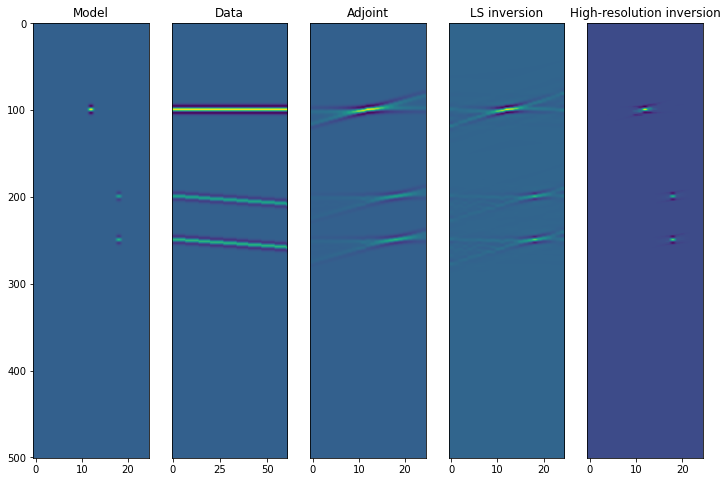

In [9]:
## High-resolution inversion
import time

tic = time.perf_counter()
N1 = 10;  # CG Iterations (Internal loop);
N2 = 3;   # Update of weights for the sparse solution: N1 = 1 LS;  N2 > 3 for High Res (Sparse) solution
[mi_l1,misfit] = pcg(radon_op,par,d,np.zeros(ma.shape),niter_in=N1,niter_out=N2,verb=1);
toc = time.perf_counter()

print(f"Python version takes {toc - tic:0.4f} seconds");

plt.figure(figsize=(12, 8));
plt.subplot(1,5,1)
plt.imshow(m,aspect='auto');plt.title('Model');
plt.subplot(1,5,2)
plt.imshow(d,aspect='auto');plt.title('Data');plt.gca().set_yticks([]);
plt.subplot(1,5,3)
plt.imshow(ma,aspect='auto');plt.title('Adjoint');plt.gca().set_yticks([]);
plt.subplot(1,5,4)
plt.imshow(mi,aspect='auto');plt.title('LS inversion');plt.gca().set_yticks([]);
plt.subplot(1,5,5)
plt.imshow(mi_l1,aspect='auto');plt.title('High-resolution inversion');plt.gca().set_yticks([]);
plt.show()


In [10]:
# inversion and recovery
mask_inds=np.concatenate((np.linspace(1,31,31),np.linspace(45,50,16),np.linspace(55,61,7)),axis=0);
mask_inds=np.int32(mask_inds);
h_mis=h[mask_inds-1];
d_mis=d[:,mask_inds-1];

par={'h':h_mis,'v':1/(p+0.00000000001),'nt':nt,'dt':dt,'type':1};

ma=radon_op(d_mis,par,-1);
mi,mistmp=pcg(radon_op,par,d_mis,np.zeros(ma.shape),niter_in=10,niter_out=1,verb=1);
mi_l1,mistmp=pcg(radon_op,par,d_mis,np.zeros(ma.shape),niter_in=10,niter_out=3,verb=1);



Outer iteration=1, Inner iteration = 1, Current misfit=30.996 

Outer iteration=1, Inner iteration = 2, Current misfit=13.314 

Outer iteration=1, Inner iteration = 3, Current misfit=7.1984 

Outer iteration=1, Inner iteration = 4, Current misfit=5.0184 

Outer iteration=1, Inner iteration = 5, Current misfit=3.9987 

Outer iteration=1, Inner iteration = 6, Current misfit=3.3689 

Outer iteration=1, Inner iteration = 7, Current misfit=2.9387 

Outer iteration=1, Inner iteration = 8, Current misfit=2.5883 

Outer iteration=1, Inner iteration = 9, Current misfit=2.2455 

Outer iteration=1, Inner iteration = 10, Current misfit=2.0161 

Outer iteration=1, Inner iteration = 1, Current misfit=30.996 

Outer iteration=1, Inner iteration = 2, Current misfit=13.314 

Outer iteration=1, Inner iteration = 3, Current misfit=7.1984 

Outer iteration=1, Inner iteration = 4, Current misfit=5.0184 

Outer iteration=1, Inner iteration = 5, Current misfit=3.9987 

Outer iteration=1, Inner iteration = 6,

In [11]:
par['h']=h;
da=radon_op(ma,par,1);
di=radon_op(mi,par,1);
di_l1=radon_op(mi_l1,par,1);

In [13]:
par

{'h': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
        5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ]),
 'v': array([-1.66666667e+00, -1.81818182e+00, -2.00000000e+00, -2.22222222e+00,
        -2.50000000e+00, -2.85714286e+00, -3.33333333e+00, -4.00000000e+00,
        -5.00000000e+00, -6.66666667e+00, -1.00000000e+01, -2.00000000e+01,
         1.00000000e+11,  2.00000000e+01,  1.00000000e+01,  6.66666667e+00,
         5.00000000e+00,  4.00000000e+00,  3.33333333e+00,  2.85714286e+00,
         2.50000000e+00,  2.22222222e+00,  2.00000000e+00,  1.81818182e+00,
         1.66666667e+00]),
 'nt': 501,
 'dt': 0.2,
 'type': 1,
 'typ': 1}

NameError: name 'mask_inds' is not defined

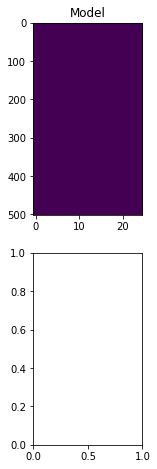

In [14]:
plt.figure(figsize=(9, 12));
plt.subplot(3,4,1)
plt.imshow(m,aspect='auto');plt.title('Model');
plt.subplot(3,4,5)

#pad zero for displaying
d_padzero=d;
d_mask=np.zeros(d.shape);d_mask[:,mask_inds-1]=1;
d_padzero=d*d_mask;
plt.imshow(d_padzero,aspect='auto',clim=(-0.5, 0.5));plt.title('Incomplete Data');


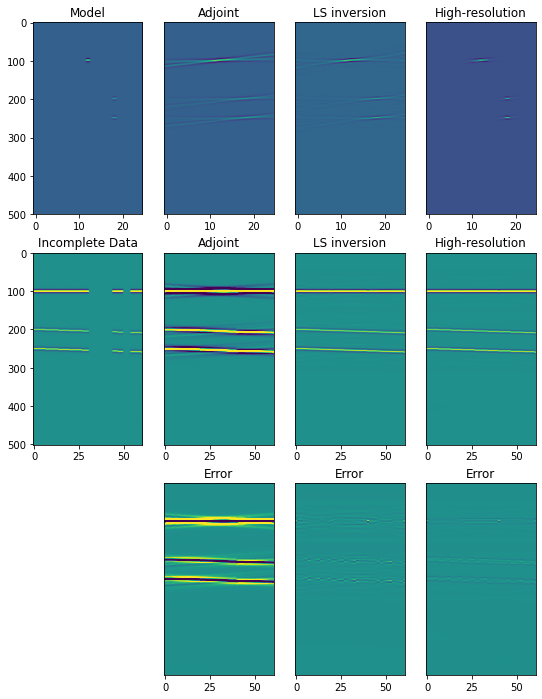

In [12]:
## Compare results

plt.figure(figsize=(9, 12));
plt.subplot(3,4,1)
plt.imshow(m,aspect='auto');plt.title('Model');
plt.subplot(3,4,5)

#pad zero for displaying
d_padzero=d;
d_mask=np.zeros(d.shape);d_mask[:,mask_inds-1]=1;
d_padzero=d*d_mask;
plt.imshow(d_padzero,aspect='auto',clim=(-0.5, 0.5));plt.title('Incomplete Data');


plt.subplot(3,4,2)
plt.imshow(ma,aspect='auto');plt.title('Adjoint');plt.gca().set_yticks([]);
plt.subplot(3,4,3)
plt.imshow(mi,aspect='auto');plt.title('LS inversion');plt.gca().set_yticks([]);
plt.subplot(3,4,4)
plt.imshow(mi_l1,aspect='auto');plt.title('High-resolution');plt.gca().set_yticks([]);

plt.subplot(3,4,6)
plt.imshow(da,aspect='auto',clim=(-50, 50));plt.title('Adjoint');plt.gca().set_yticks([]);
plt.subplot(3,4,7)
plt.imshow(di,aspect='auto',clim=(-0.5, 0.5));plt.title('LS inversion');plt.gca().set_yticks([]);
plt.subplot(3,4,8)
plt.imshow(di_l1,aspect='auto',clim=(-0.5, 0.5));plt.title('High-resolution');plt.gca().set_yticks([]);


plt.subplot(3,4,10)
plt.imshow(d-da,aspect='auto',clim=(-50, 50));plt.title('Error');plt.gca().set_yticks([]);
plt.subplot(3,4,11)
plt.imshow(d-di,aspect='auto',clim=(-0.2, 0.2));plt.title('Error');plt.gca().set_yticks([]);
plt.subplot(3,4,12)
plt.imshow(d-di_l1,aspect='auto',clim=(-0.2, 0.2));plt.title('Error');plt.gca().set_yticks([]);



# Using optimized library (pyradon)


Optimized version takes 0.1405 seconds


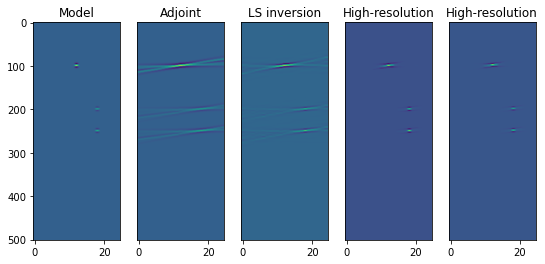

In [13]:
import pyradon as pr

import time

tic = time.perf_counter()
N1 = 10;  # CG Iterations (Internal loop);
N2 = 3;   # Update of weights for the sparse solution: N1 = 1 LS;  N2 > 3 for High Res (Sparse) solution
par['typ']=1;par['h']=h;
mi_l1_new=pr.radon_l1c(par,d,np.zeros(m.shape),niter_in=N1,niter_out=N2,verb=1)[0]

toc = time.perf_counter()

print(f"Optimized version takes {toc - tic:0.4f} seconds");


plt.figure(figsize=(9, 4));
plt.subplot(1,5,1)
plt.imshow(m,aspect='auto');plt.title('Model');
plt.subplot(1,5,2)
plt.imshow(ma,aspect='auto');plt.title('Adjoint');plt.gca().set_yticks([]);
plt.subplot(1,5,3)
plt.imshow(mi,aspect='auto');plt.title('LS inversion');plt.gca().set_yticks([]);
plt.subplot(1,5,4)
plt.imshow(mi_l1,aspect='auto');plt.title('High-resolution');plt.gca().set_yticks([]);
plt.subplot(1,5,5)
plt.imshow(mi_l1_new,aspect='auto');plt.title('High-resolution');plt.gca().set_yticks([]);



In [1]:
import pyradon as pr

In [12]:
import numpy as np

dp=0.05;dh=0.1;

h=np.linspace(0,6,int(6/dh+1));

nh=len(h);
p=np.linspace(-0.6,0.60,int(1.21/dp)+1);
nnp=len(p);

dt=0.2;nt=501;
m=np.zeros([nt,nnp]);
d=np.zeros([nt,nh]);
w,tw=ricker(0.5,dt);

N1 = 10;  # CG Iterations (Internal loop);
N2 = 3;   # Update of weights for the sparse solution: N1 = 1 LS;  N2 > 3 for High Res (Sparse) solution
par={'h':h,'v':1/(p+0.00000000001),'nt':nt,'dt':dt,'type':1}

par['typ']=1;#par['h']=h;
mi_l1_new=pr.radon_l1c(par,d,np.zeros(m.shape),niter_in=N1,niter_out=N2,verb=1)[0]


In [10]:
N1

10

In [11]:
N2

3